# Simple Network with Two Stages 

This example contains a network with two stages. The input stage has 6 inputs and 12 outputs while the output stage has 12 inputs and 6 outputs. This case is a piece of a braille recognition example found below. 

http://neuroph.sourceforge.net/tutorials/Braille/RecognitionOfBrailleAlphabetUsingNeuralNetworks.html

This case requires a hidden stage for proper convergence so this example is only showing that all of the standard operations for the neural network can work for this case.

1. Feedforward Operation
1. Tap/Bias Updates
1. Error Back Propagation


## Hardware Details

Details of the architecture for this block can be found in the general documentation and the exact settings can be found in the code generator details shown below. 

## Code Generator Details

The code used for this example is contained in the following locations : 

1. [Test Generator](https://github.com/andywag/NeuralHDL/blob/master/src/test/scala/com/simplifide/generate/neural/DoubleStageTest.scala)
1. [Block Generator](https://github.com/andywag/NeuralHDL/blob/master/src/main/scala/com/simplifide/generate/blocks/neural/simple/NeuralNetwork.scala)
1. [Generated Code and Test Results](https://github.com/andywag/NeuralHDL/tree/master/tests/full)


In [42]:
## Test Results

In [43]:
import sys
sys.path.append("../../python") # go to parent dir

import numpy as numpy
import matplotlib.pyplot as plt
import utils.FloatUtil as fu
import utils.PlotUtil as pu


def show_results(base,index) : 
    pu.handleStage(base,index)
    plt.show()
    


### Identity Matrix Test Results 

This very simple network will not properly converge for this example. For that reason the network was tested with an identity matrix (input = output) to prove the convergence of the taps and bias for this case. The results of the test are shown below with a relatively quick convergence and small steady state error. The case is not actually an identity matrix but a diagonal matrix with alternating +1/-1.  

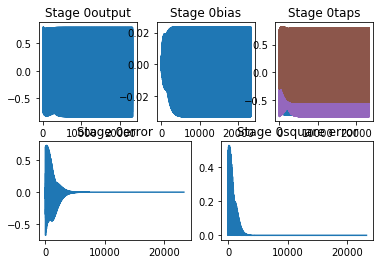

In [44]:
show_results("/home/andy/projects/NeuralHDL/tests/full/data_ident/",0)

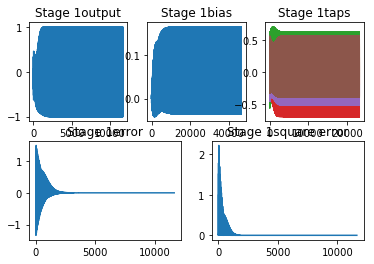

In [45]:
show_results("/home/andy/projects/NeuralHDL/tests/full/data_ident/",1)


### Test results with full test Case

This case uses the input/output matrix shown below. The first 6 columns are the input to the block and the last 6 columns are the expected values. 

```scala
  Array(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
  Array(1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0)
  Array(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0)
  Array(1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0)
  Array(1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0)
  Array(0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0)
```

The test results for this case are shown below. The main purpose of this test is to show a network which contains all of the operations for the network. The results shown below show the system converging and tracking for both the outputs of the first stage and output stage.  

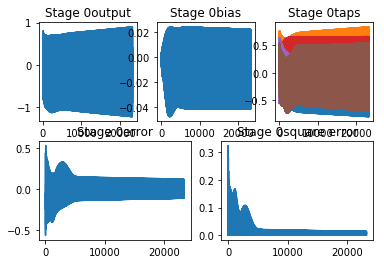

In [46]:
show_results("/home/andy/projects/NeuralHDL/tests/full/data_first/",0)


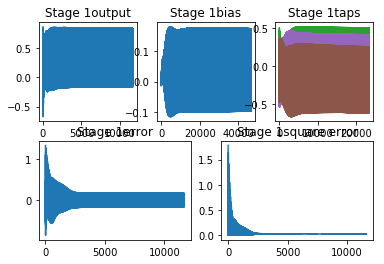

In [47]:
show_results("/home/andy/projects/NeuralHDL/tests/full/data_first/",1)
